# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

In [3]:
cities_dict = {'City':cities}
cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,City
0,hobart
1,constitucion
2,carnarvon
3,sentyabrskiy
4,satitoa


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Open weather
url = "http://api.openweathermap.org/data/2.5/weather?"

# Partial query url
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

In [5]:
# Test response to see what the data looks like
city_test = 'Seattle'
response = requests.get(query_url+city_test).json()
response

{'coord': {'lon': -122.33, 'lat': 47.61},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 44.46,
  'feels_like': 41.27,
  'temp_min': 42.01,
  'temp_max': 46.99,
  'pressure': 1013,
  'humidity': 100},
 'visibility': 16093,
 'wind': {'speed': 3.36, 'deg': 330},
 'rain': {'1h': 0.66},
 'clouds': {'all': 90},
 'dt': 1579965181,
 'sys': {'type': 1,
  'id': 5692,
  'country': 'US',
  'sunrise': 1579967071,
  'sunset': 1580000300},
 'timezone': -28800,
 'id': 5809844,
 'name': 'Seattle',
 'cod': 200}

In [51]:
# test data pulling
# test_clouds = response['clouds']['all']
# test_country = response['sys']['country']
# test_date = response['dt']
# test_humidity = response['main']['humidity']
# test_lat = response['coord']['lat']
# test_lng = response['coord']['lon']
# test_temp = response['main']['temp_max']
# test_wind = response['wind']['speed']
# print(f'clouds = {test_clouds}, country = {test_country}, date = {test_date}, humidity = {test_humidity}, latitude = {test_lat}, longitude = {test_lng}, temp = {test_temp}, wind = {test_wind}')

In [6]:
# Require City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
# City is already available
weather_city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind = []
call_count = 0
city_count = 0
set_count = 1
#Loop through cities and add appropriate data to lists
#Incorporate 60 second timer every 50 cities to ensure API doesnt get maxed out
print('Begin data retrieval')
print('-------------------------')
for index, row in cities_df.iterrows():
    city = row['City']
    response = requests.get(query_url+city).json()
    city_count = city_count + 1
    try:
        print(f'Processing record {city_count} of Set {set_count} | {city}')
        weather_city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except (KeyError, IndexError):
        print('-------------------------')
        print("City not found, skipping...")
    call_count = call_count + 1
    print('-------------------------')
    if call_count == 50:
        print("50 results found, waiting for API to refresh")
        time.sleep(60)
        set_count = set_count + 1
        call_count = 0
        city_count = 0
print('Data retrieval complete')
print('-------------------------')

Begin data retrieval
-------------------------
Processing record 1 of Set 1 | hobart
-------------------------
Processing record 2 of Set 1 | constitucion
-------------------------
Processing record 3 of Set 1 | carnarvon
-------------------------
Processing record 4 of Set 1 | sentyabrskiy
-------------------------
City not found, skipping...
-------------------------
Processing record 5 of Set 1 | satitoa
-------------------------
City not found, skipping...
-------------------------
Processing record 6 of Set 1 | aklavik
-------------------------
Processing record 7 of Set 1 | nelson bay
-------------------------
Processing record 8 of Set 1 | hasaki
-------------------------
Processing record 9 of Set 1 | rikitea
-------------------------
Processing record 10 of Set 1 | maningrida
-------------------------
Processing record 11 of Set 1 | arraial do cabo
-------------------------
Processing record 12 of Set 1 | lavrentiya
-------------------------
Processing record 13 of Set 1 | bar

Processing record 13 of Set 3 | boralday
-------------------------
Processing record 14 of Set 3 | abiy adi
-------------------------
City not found, skipping...
-------------------------
Processing record 15 of Set 3 | vaitupu
-------------------------
City not found, skipping...
-------------------------
Processing record 16 of Set 3 | chuy
-------------------------
Processing record 17 of Set 3 | tautira
-------------------------
Processing record 18 of Set 3 | cape town
-------------------------
Processing record 19 of Set 3 | broome
-------------------------
Processing record 20 of Set 3 | batagay
-------------------------
Processing record 21 of Set 3 | boke
-------------------------
Processing record 22 of Set 3 | hami
-------------------------
Processing record 23 of Set 3 | hermanus
-------------------------
Processing record 24 of Set 3 | ilulissat
-------------------------
Processing record 25 of Set 3 | saldanha
-------------------------
Processing record 26 of Set 3 | bolu

Processing record 23 of Set 5 | brownsville
-------------------------
Processing record 24 of Set 5 | lebu
-------------------------
Processing record 25 of Set 5 | iralaya
-------------------------
Processing record 26 of Set 5 | samusu
-------------------------
City not found, skipping...
-------------------------
Processing record 27 of Set 5 | hihifo
-------------------------
City not found, skipping...
-------------------------
Processing record 28 of Set 5 | grand river south east
-------------------------
City not found, skipping...
-------------------------
Processing record 29 of Set 5 | djibo
-------------------------
Processing record 30 of Set 5 | khani
-------------------------
Processing record 31 of Set 5 | brae
-------------------------
Processing record 32 of Set 5 | rawson
-------------------------
Processing record 33 of Set 5 | tra vinh
-------------------------
Processing record 34 of Set 5 | coffs harbour
-------------------------
Processing record 35 of Set 5 | n

Processing record 38 of Set 7 | mende
-------------------------
Processing record 39 of Set 7 | angoche
-------------------------
Processing record 40 of Set 7 | maghama
-------------------------
City not found, skipping...
-------------------------
Processing record 41 of Set 7 | amnat charoen
-------------------------
Processing record 42 of Set 7 | vanimo
-------------------------
Processing record 43 of Set 7 | bilma
-------------------------
Processing record 44 of Set 7 | kenai
-------------------------
Processing record 45 of Set 7 | lorengau
-------------------------
Processing record 46 of Set 7 | saint-louis
-------------------------
Processing record 47 of Set 7 | alofi
-------------------------
Processing record 48 of Set 7 | wazzan
-------------------------
City not found, skipping...
-------------------------
Processing record 49 of Set 7 | alta floresta
-------------------------
Processing record 50 of Set 7 | sorvag
-------------------------
City not found, skipping...


Processing record 1 of Set 10 | fernley
-------------------------
Processing record 2 of Set 10 | boa vista
-------------------------
Processing record 3 of Set 10 | havelock
-------------------------
Processing record 4 of Set 10 | kayes
-------------------------
Processing record 5 of Set 10 | botou
-------------------------
Processing record 6 of Set 10 | haines junction
-------------------------
Processing record 7 of Set 10 | saint george
-------------------------
Processing record 8 of Set 10 | khakhea
-------------------------
Processing record 9 of Set 10 | abdanan
-------------------------
Processing record 10 of Set 10 | fuente de oro
-------------------------
Processing record 11 of Set 10 | lolua
-------------------------
City not found, skipping...
-------------------------
Processing record 12 of Set 10 | teguise
-------------------------
Processing record 13 of Set 10 | dunda
-------------------------
Processing record 14 of Set 10 | san jeronimo
------------------------

Processing record 8 of Set 12 | gravelbourg
-------------------------
Processing record 9 of Set 12 | pacific grove
-------------------------
Processing record 10 of Set 12 | noumea
-------------------------
Processing record 11 of Set 12 | vaitape
-------------------------
Processing record 12 of Set 12 | ramshir
-------------------------
Processing record 13 of Set 12 | sioux lookout
-------------------------
Processing record 14 of Set 12 | san ignacio
-------------------------
Processing record 15 of Set 12 | saryshagan
-------------------------
City not found, skipping...
-------------------------
Processing record 16 of Set 12 | pundaguitan
-------------------------
Processing record 17 of Set 12 | hobyo
-------------------------
Processing record 18 of Set 12 | voznesenye
-------------------------
Processing record 19 of Set 12 | warqla
-------------------------
City not found, skipping...
-------------------------
Processing record 20 of Set 12 | tignere
-----------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_dict = {
    'City':weather_city,
    'Cloudiness':cloudiness,
    'Country':country,
    'Date':date,
    'Humidity':humidity,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':max_temp,
    'Wind Speed':wind
}
cities_weather = pd.DataFrame(cities_dict)
cities_weather.head()
# cities_weather.info()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hobart,100,AU,1579965707,77,-42.88,147.33,66.00,1.01
1,Constitucion,0,CL,1579965902,38,-35.33,-72.42,72.21,8.25
2,Carnarvon,0,AU,1579965902,74,-24.87,113.63,77.43,22.84
3,Aklavik,100,CA,1579965718,95,68.22,-135.01,-13.76,24.36
4,Nelson Bay,99,AU,1579965923,90,-32.72,152.15,77.00,3.89


In [8]:
cities_weather.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

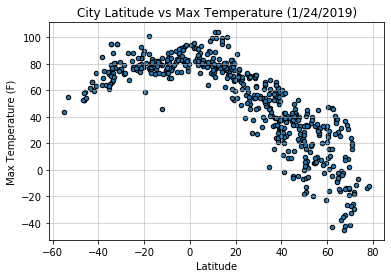

<Figure size 432x288 with 0 Axes>

In [9]:
fig1, ax1 = plt.subplots()
cities_weather.plot(kind='scatter',x='Lat',y='Max Temp', ax=ax1,edgecolors='black',grid=True)
ax1.grid(linestyle='-',linewidth='0.5')
plt.title('City Latitude vs Max Temperature (1/24/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.show()
plt.savefig("../output_data/fig1-Lat_Temp.png")

#### Latitude vs. Humidity Plot

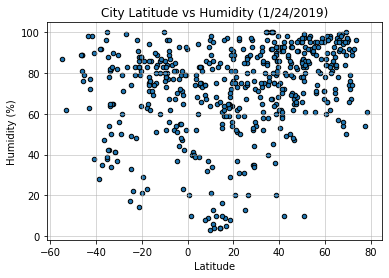

<Figure size 432x288 with 0 Axes>

In [10]:
fig2, ax2 = plt.subplots()
cities_weather.plot(kind='scatter',x='Lat',y='Humidity', ax=ax2,edgecolors='black',grid=True)
ax2.grid(linestyle='-',linewidth='0.5')
plt.title('City Latitude vs Humidity (1/24/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
plt.savefig("../output_data/fig2-Lat_Hum.png")

#### Latitude vs. Cloudiness Plot

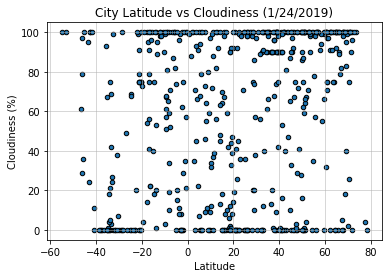

<Figure size 432x288 with 0 Axes>

In [11]:
fig3, ax3 = plt.subplots()
cities_weather.plot(kind='scatter',x='Lat',y='Cloudiness', ax=ax3,edgecolors='black',grid=True)
ax3.grid(linestyle='-',linewidth='0.5')
plt.title('City Latitude vs Cloudiness (1/24/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
plt.savefig("../output_data/fig3-Lat_Cloud.png")

#### Latitude vs. Wind Speed Plot

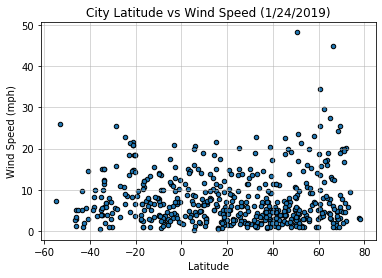

<Figure size 432x288 with 0 Axes>

In [12]:
fig4, ax4 = plt.subplots()
cities_weather.plot(kind='scatter',x='Lat',y='Wind Speed', ax=ax4,edgecolors='black',grid=True)
ax4.grid(linestyle='-',linewidth='0.5')
plt.title('City Latitude vs Wind Speed (1/24/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
plt.savefig("../output_data/fig4-Lat_Wind.png")

## Linear Regression

In [114]:
# OPTIONAL: Create a function to create Linear Regression plots

# n_slope,n_int,n_r,n_p,n_std_err = linregress(xaxis,yaxis)
# n_fit = n_slope*xaxis+n_int
# s_slope,s_int,s_r,s_p,s_std_err = linregress(xaxis,yaxis)
# s_fit = s_slope*xaxis+s_int

In [13]:
# Create Northern and Southern Hemisphere DataFrames
north = cities_weather[cities_weather.Lat >0]
south = cities_weather[cities_weather.Lat <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.762


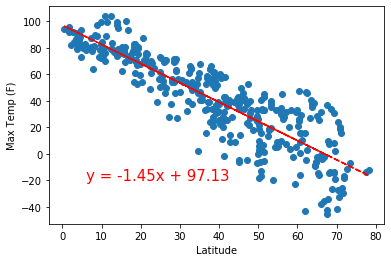

In [14]:
xaxis = north['Lat']
yaxis = north['Max Temp']
n_slope,n_int,n_r,n_p,n_std_err = linregress(xaxis,yaxis)
n_fit = n_slope*xaxis+n_int
r_sq = round(n_r**2,3)
line_eq='y = '+str(round(n_slope,2))+'x + '+str(round(n_int,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,n_fit,'--',color='red')
plt.annotate(line_eq,(6,-20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f'The r-squared is: {r_sq}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.333


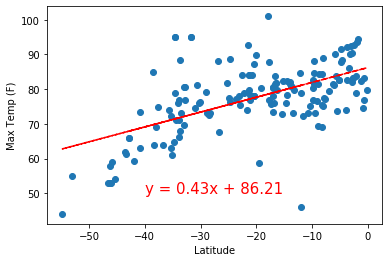

In [15]:
xaxis = south['Lat']
yaxis = south['Max Temp']
s_slope,s_int,s_r,s_p,s_std_err = linregress(xaxis,yaxis)
s_fit = s_slope*xaxis+s_int
r_sq = round(s_r**2,3)
line_eq='y = '+str(round(s_slope,2))+'x + '+str(round(s_int,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,s_fit,'--',color='red')
plt.annotate(line_eq,(-40,50),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f'The r-squared is: {r_sq}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.179


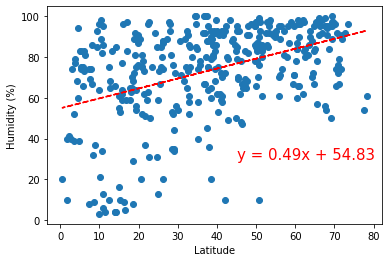

In [16]:
xaxis = north['Lat']
yaxis = north['Humidity']
n_slope,n_int,n_r,n_p,n_std_err = linregress(xaxis,yaxis)
n_fit = n_slope*xaxis+n_int
r_sq = round(n_r**2,3)
line_eq='y = '+str(round(n_slope,2))+'x + '+str(round(n_int,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,n_fit,'--',color='red')
plt.annotate(line_eq,(45,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-squared is: {r_sq}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


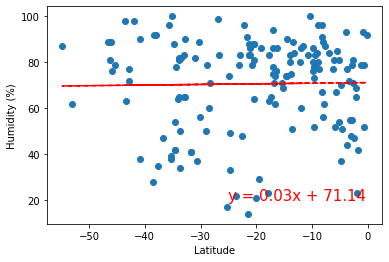

In [17]:
xaxis = south['Lat']
yaxis = south['Humidity']
s_slope,s_int,s_r,s_p,s_std_err = linregress(xaxis,yaxis)
s_fit = s_slope*xaxis+s_int
r_sq = round(s_r**2,3)
line_eq='y = '+str(round(s_slope,2))+'x + '+str(round(s_int,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,s_fit,'--',color='red')
plt.annotate(line_eq,(-25,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f'The r-squared is: {r_sq}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.047


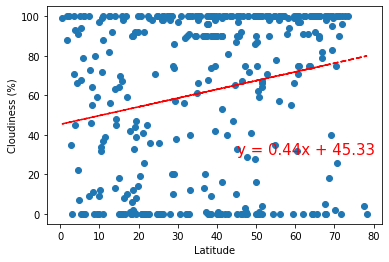

In [18]:
xaxis = north['Lat']
yaxis = north['Cloudiness']
n_slope,n_int,n_r,n_p,n_std_err = linregress(xaxis,yaxis)
n_fit = n_slope*xaxis+n_int
r_sq = round(n_r**2,3)
line_eq='y = '+str(round(n_slope,2))+'x + '+str(round(n_int,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,n_fit,'--',color='red')
plt.annotate(line_eq,(45,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-squared is: {r_sq}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.034


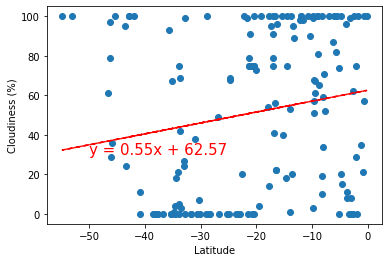

In [19]:
xaxis = south['Lat']
yaxis = south['Cloudiness']
s_slope,s_int,s_r,s_p,s_std_err = linregress(xaxis,yaxis)
s_fit = s_slope*xaxis+s_int
r_sq = round(s_r**2,3)
line_eq='y = '+str(round(s_slope,2))+'x + '+str(round(s_int,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,s_fit,'--',color='red')
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-squared is: {r_sq}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.014


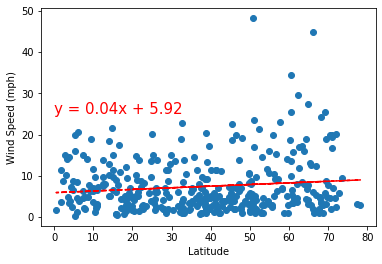

In [20]:
xaxis = north['Lat']
yaxis = north['Wind Speed']
n_slope,n_int,n_r,n_p,n_std_err = linregress(xaxis,yaxis)
n_fit = n_slope*xaxis+n_int
r_sq = round(n_r**2,3)
line_eq='y = '+str(round(n_slope,2))+'x + '+str(round(n_int,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,n_fit,'--',color='red')
plt.annotate(line_eq,(0,25),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-squared is: {r_sq}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001


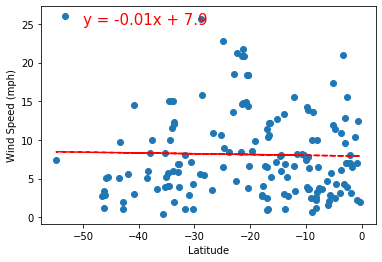

In [21]:
xaxis = south['Lat']
yaxis = south['Wind Speed']
s_slope,s_int,s_r,s_p,s_std_err = linregress(xaxis,yaxis)
s_fit = s_slope*xaxis+s_int
r_sq = round(s_r**2,3)
line_eq='y = '+str(round(s_slope,2))+'x + '+str(round(s_int,2))
plt.scatter(xaxis,yaxis)
plt.plot(xaxis,s_fit,'--',color='red')
plt.annotate(line_eq,(-50,25),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-squared is: {r_sq}')
plt.show()